### **Bag of words (BoW)**

In Natural Language Processing (NLP) text data needs to be converted into numbers so that machine learning algorithms can understand it. One common method to do this is Bag of Words (BoW) model. It turns text like sentence, paragraph or document into a collection of words and counts how often each word appears but ignoring the order of the words. It does not consider the order of the words or their grammar but focuses on counting how often each word appears in the text.

This makes it useful for tasks like text classification, sentiment analysis and clustering.

# Key Components of BoW
**Vocabulary:** It is a list of all unique words from the entire dataset. Each word in the vocabulary corresponds to a feature in the model.

**Document Representation:** Each document is represented as a vector where each element shows the frequency of the words from the vocabulary in that document. The frequency of each word is used as a feature for the model.

**Step 1: Preprocessing the Text**

Before applying the BoW model, we need to preprocess the text. This includes:

Converting the text to lowercase

Removing non-word characters

Removing extra spaces

In [2]:
import nltk
import re

text = """Beans. I was trying to explain to somebody as we were flying in, that's corn. That's beans.
And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction.
I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and
we're lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven't seen
in a long time, and somehow he has not aged and I have. And it's great to see you, Governor. I want to thank President Killeen and everybody
at then U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me.
He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room.
I know people are still wondering why I didn't speak at the commencement."""

nltk.download('punkt_tab')
dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sentence 1: beans 
Sentence 2: i was trying to explain to somebody as we were flying in that s corn 
Sentence 3: that s beans 
Sentence 4: and they were very impressed at my agricultural knowledge 
Sentence 5: please give it up for amaury once again for that outstanding introduction 
Sentence 6: i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here 
Sentence 7: i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have 
Sentence 8: and it s great to see you governor 
Sentence 9: i want to thank president killeen and everybody at then u of i system for making it possible for me to be here today 
Sentence 10: and i am deeply honored at the paul douglas award that is being given to me 
Sentence 11: he is somebody who set the path for so much outstanding public service here in illinois 
Sent

**Step 2: Counting Word Frequencies**

In this step, we count the frequency of each word in the preprocessed text. We will store these counts in a pandas DataFrame to view them easily in a tabular format.

* We initialize a dictionary to hold our word counts.
* Then, we tokenize each sentence into words.
* For each word, we check if it exists in our dictionary. If it does, we increment its count. If it doesn’t, we add it to the dictionary with a count of 1.

In [5]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)

            Word  Frequency
3       somebody          3
0          beans          2
17         today          2
12   outstanding          2
41          want          2
..           ...        ...
67        people          1
68         still          1
69     wondering          1
70         speak          1
71  commencement          1

[72 rows x 2 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 frequent words: ['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who']


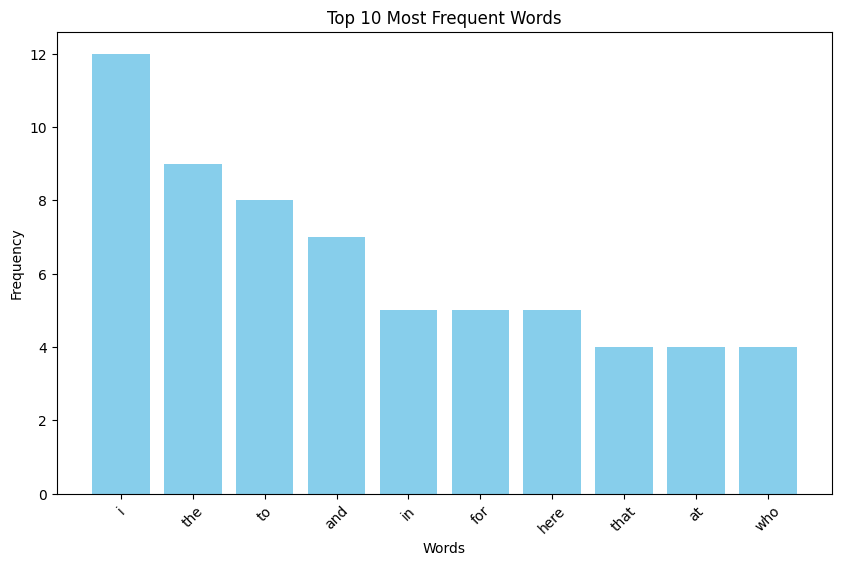

In [6]:
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

**Step 4: Building the Bag of Words (BoW) Model**

Now we will build the Bag of Words (BoW) model. This model is represented as a binary matrix where each row corresponds to a sentence and each column represents one of the top N frequent words. A 1 in the matrix shows that the word is present in the sentence and a 0 shows its absence.

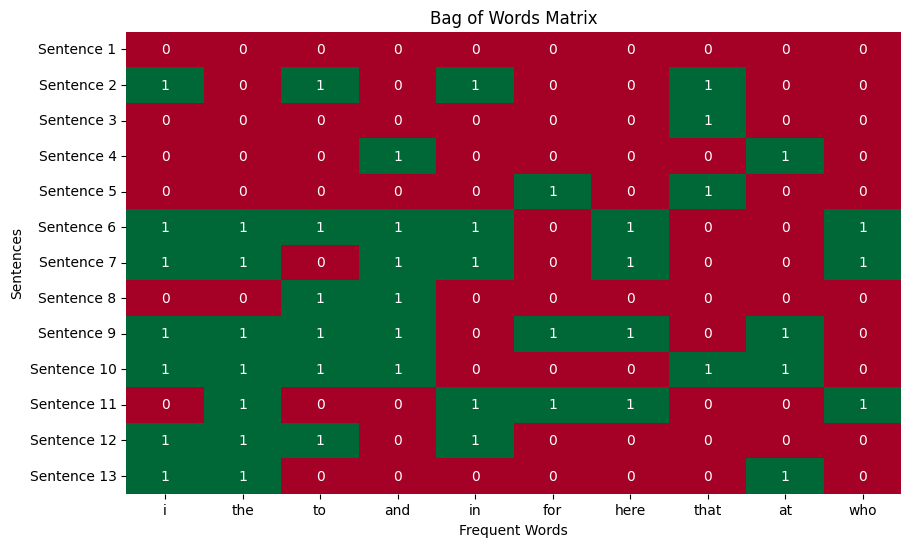

In [7]:
import numpy as np
import seaborn as sns

X = []

for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

**Advantages of the Bag of Words Model**

**Simplicity:** It is easy to implement and computationally efficient.
**Versatility:** It can be used for various NLP tasks such as text classification, sentiment analysis and document clustering.

**Interpretability:** The resulting vectors are interpretable which makes it easy to understand which words are most important in a document.

**Limitations of BoW**

**Loss of Context:** It ignores word order and context which means it might miss important relationships between words.

**Sparsity:** When working with large datasets, most word vectors will be sparse (containing mostly zeros) which can lead to inefficiency.

**Limited Semantic Understanding:** The model doesn’t capture the meaning of words which can be important for some NLP tasks.